## Load libraries

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

## Load data

In [186]:
image_dir = '/home/gaurav/datasets/agri/Tomato_Classifier/data/'

healthy_images_dir = image_dir + 'Healthy/'
unhealthy_images_dir = image_dir + 'UnHealthy/'

In [187]:
healthy_image_files = [(healthy_images_dir + '/'+ f)  
                       for f in os.listdir(healthy_images_dir) 
                       if f.endswith('.jpg')]

In [188]:
healthy_image_files[0:5]

['/home/gaurav/datasets/agri/Tomato_Classifier/data/Healthy//1e1aa3d8-d12f-47e1-b316-b8656ab3f2b6___RS_HL 0075_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/data/Healthy//3dd714a8-5c95-4d47-a9d0-0ac15a499c2c___RS_HL 0386_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/data/Healthy//7b651761-da31-437a-be17-6e49912f622a___RS_HL 9703_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/data/Healthy//2df73051-0fdf-4ed5-a626-205e245ad8c7___GH_HL Leaf 233_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/data/Healthy//3e9a67e4-492b-4306-be1b-0a2624ea5c3e___GH_HL Leaf 175_final_masked.jpg']

In [189]:
unhealthy_image_files = [(unhealthy_images_dir + '/'+ f)  
                         for f in os.listdir(unhealthy_images_dir) 
                         if f.endswith('.jpg')]

In [190]:
unhealthy_image_files[0:5]

['/home/gaurav/datasets/agri/Tomato_Classifier/data/UnHealthy//2ba2d560-919c-48cd-8f98-c4caf8fc37e7___Crnl_L.Mold 8994_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/data/UnHealthy//0db67be3-f733-4d15-b7d9-5d075b2cafc7___RS_Erly.B 6401_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/data/UnHealthy//4cec5b1e-14d2-4b8f-ab8a-57b68758f30c___Crnl_L.Mold 8715_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/data/UnHealthy//0f1d337f-e8c5-445a-83a0-b89915eacb72___UF.GRC_BS_Lab Leaf 0435_final_masked.jpg',
 '/home/gaurav/datasets/agri/Tomato_Classifier/data/UnHealthy//0d835caf-0069-4fa5-a022-c8cc7763189c___Com.G_SpM_FL 8917_final_masked.jpg']

In [192]:
healthy_images = [cv2.imread(img) for img in healthy_image_files]
unhealthy_images = [cv2.imread(img) for img in unhealthy_image_files]

## Data Pre-processing

### Healthy Leaf

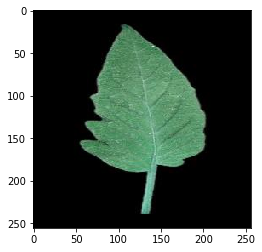

In [193]:
plt.imshow( healthy_images[4])

In [194]:
len(healthy_images)

500

In [195]:
image_shape = healthy_images[0].shape
print( image_shape )

(256, 256, 3)


In [196]:
type(healthy_images)

list

In [198]:
# Convert list to numpy array
healthy_images_np = np.array(healthy_images)
healthy_images_np.shape

(500, 256, 256, 3)

### Unhealthy Leaf

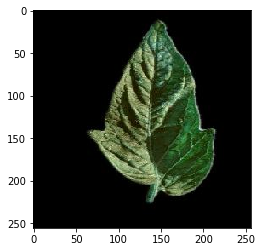

In [199]:
plt.imshow( unhealthy_images[4])

In [200]:
len(unhealthy_images)

540

In [203]:
unhealthy_images_np = np.array( unhealthy_images )
unhealthy_images_np.shape

(540, 256, 256, 3)

### Creating labels array

In [204]:
y_labels = [0] * len( healthy_images ) + [1] * len( unhealthy_images )

In [205]:
len(y_labels)

1040

In [206]:
y_labels[495:510]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [207]:
# Convert labels to numpy array
y_labels_np = np.array( y_labels )

### Combining healthy and unhealthy images

In [208]:
all_images_np = np.concatenate( (healthy_images_np, unhealthy_images_np), axis = 0 )

In [209]:
all_images_np.shape

(1040, 256, 256, 3)

In [210]:
len(all_images_np)

1040

## Splitting train and test

In [211]:
import random

all_indexes = list( range(len(all_images_np)) )
test_indexes = random.sample( all_indexes, 300 )
train_indexes = list( set( all_indexes ) - set( test_indexes ) )

In [212]:
## Train images
X_train = all_images_np[train_indexes]
y_train = y_labels_np[train_indexes]

## Test images
X_test = all_images_np[test_indexes]
y_test = y_labels_np[test_indexes]

### Sanity Check

In [213]:
def sanity_checker( idx ):
    plt.imshow( X_train[idx] );
    plt.show();
    print( y_train[idx])

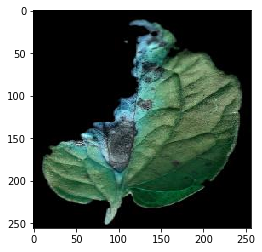

1


In [214]:
sanity_checker( 634 )

## Build the Model for Classifying Healthy or Unhealthy

In [215]:
import keras
import tensorflow as tf
from keras import backend as K

In [216]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [217]:
# normalize inputs
X_train_norm = (X_train/255) - 0.5
X_test_norm = (X_test/255) - 0.5

### Model 1:

** Architecture **
- Conv2D -> MaxPool -> Conv2D -> MaxPool -> Dense -> Dense -> Sigmoid

** Optimizer **

- SGD
- Batch size = 32
- Epoch = 20

In [130]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=1, input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
    
model.add(Dense(16))
model.add(LeakyReLU(0.1))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 8)       224       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 254, 254, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 16)        1168      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 82, 82, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11664)             0         
__________

In [132]:
model.compile(optimizer='sgd',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [133]:
BATCH_SIZE = 32
EPOCHS = 20

In [134]:
history = model.fit(
    X_train_norm, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_norm, y_test),
    verbose=1
)

Train on 740 samples, validate on 300 samples
Epoch 1/20
740/740 [==============================] - 11s 15ms/step - loss: 0.6891 - acc: 0.6162 - val_loss: 0.6871 - val_acc: 0.6200
Epoch 2/20
740/740 [==============================] - 11s 15ms/step - loss: 0.6841 - acc: 0.6568 - val_loss: 0.6814 - val_acc: 0.6900
Epoch 3/20
740/740 [==============================] - 11s 15ms/step - loss: 0.6776 - acc: 0.7081 - val_loss: 0.6826 - val_acc: 0.4967
Epoch 4/20
740/740 [==============================] - 11s 15ms/step - loss: 0.6720 - acc: 0.6122 - val_loss: 0.6665 - val_acc: 0.7467
Epoch 5/20
740/740 [==============================] - 11s 15ms/step - loss: 0.6618 - acc: 0.6892 - val_loss: 0.6557 - val_acc: 0.7333
Epoch 6/20
740/740 [==============================] - 11s 15ms/step - loss: 0.6496 - acc: 0.7257 - val_loss: 0.6406 - val_acc: 0.7300
Epoch 7/20
740/740 [==============================] - 11s 15ms/step - loss: 0.6324 - acc: 0.7432 - val_loss: 0.6309 - val_acc: 0.6533
Epoch 8/20
740/7

In [135]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### function: train and test accuracy plot

In [138]:
def plot_train_val_accuracy(hist):
    plt.plot(hist['acc'])
    plt.plot(hist['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### function: train and test loss plot

In [139]:
def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

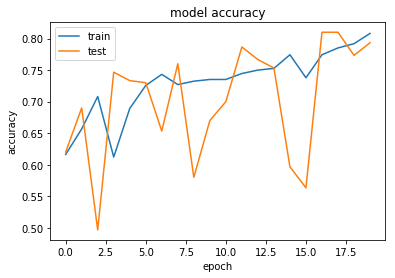

In [140]:
plot_train_val_accuracy(history.history)

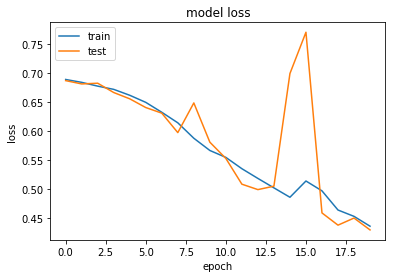

In [141]:
plot_train_val_loss(history.history)

### Model 2: Dealing with Variations in GD Loss

** Architecture **
- Conv2D -> MaxPool -> Conv2D -> MaxPool -> Dense -> Dense -> Sigmoid

** Optimizer **

- Adam (change)
- Batch size = 32
- Epoch = 20

In [144]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=1,input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
    
model.add(Dense(16))
model.add(LeakyReLU(0.1))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [145]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

BATCH_SIZE = 32
EPOCHS = 20

history = model.fit(
    X_train_norm, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_norm, y_test),
    verbose=1
)

Train on 740 samples, validate on 300 samples
Epoch 1/20
740/740 [==============================] - 11s 14ms/step - loss: 0.6851 - acc: 0.6432 - val_loss: 0.6110 - val_acc: 0.6967
Epoch 2/20
740/740 [==============================] - 11s 15ms/step - loss: 0.5513 - acc: 0.7473 - val_loss: 0.4815 - val_acc: 0.7867
Epoch 3/20
740/740 [==============================] - 11s 15ms/step - loss: 0.4571 - acc: 0.7757 - val_loss: 0.4823 - val_acc: 0.7467
Epoch 4/20
740/740 [==============================] - 11s 15ms/step - loss: 0.4047 - acc: 0.8230 - val_loss: 0.3909 - val_acc: 0.8200
Epoch 5/20
740/740 [==============================] - 11s 15ms/step - loss: 0.3802 - acc: 0.8297 - val_loss: 0.3658 - val_acc: 0.8300
Epoch 6/20
740/740 [==============================] - 11s 15ms/step - loss: 0.2991 - acc: 0.8824 - val_loss: 0.3153 - val_acc: 0.8633
Epoch 7/20
740/740 [==============================] - 11s 15ms/step - loss: 0.2368 - acc: 0.9149 - val_loss: 0.2273 - val_acc: 0.9233
Epoch 8/20
740/7

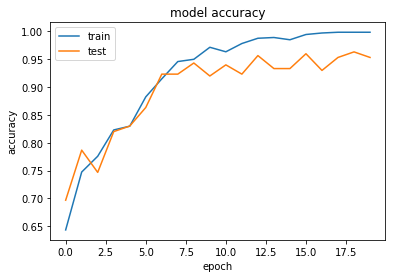

In [146]:
plot_train_val_accuracy(history.history)

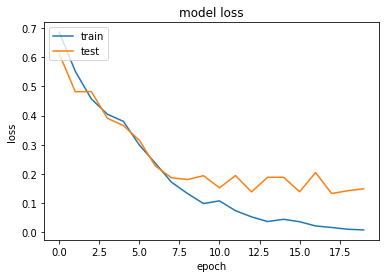

In [147]:
plot_train_val_loss(history.history)

### Model 3: Dealing with Overfitting

** Architecture **
- Conv2D -> MaxPool -> Conv2D -> MaxPool -> Dense -> Dropout -> Dense -> Dropout -> (Dense -> Sigmoid)

** Optimizer **

- Adam
- Batch size = 32
- Epoch = 20

In [159]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=1,input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
    
model.add(Dense(32))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(8))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [160]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

BATCH_SIZE = 32
EPOCHS = 20

history = model.fit(
    X_train_norm, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_norm, y_test),
    verbose=1
)

Train on 740 samples, validate on 300 samples
Epoch 1/20
740/740 [==============================] - 11s 15ms/step - loss: 0.7587 - acc: 0.4892 - val_loss: 0.6703 - val_acc: 0.6300
Epoch 2/20
740/740 [==============================] - 11s 14ms/step - loss: 0.6578 - acc: 0.6122 - val_loss: 0.6463 - val_acc: 0.7367
Epoch 3/20
740/740 [==============================] - 11s 14ms/step - loss: 0.6553 - acc: 0.6149 - val_loss: 0.5831 - val_acc: 0.7733
Epoch 4/20
740/740 [==============================] - 11s 14ms/step - loss: 0.5960 - acc: 0.6811 - val_loss: 0.5698 - val_acc: 0.7833
Epoch 5/20
740/740 [==============================] - 11s 15ms/step - loss: 0.5172 - acc: 0.7541 - val_loss: 0.4805 - val_acc: 0.7800
Epoch 6/20
740/740 [==============================] - 11s 14ms/step - loss: 0.4598 - acc: 0.7892 - val_loss: 0.4018 - val_acc: 0.8833
Epoch 7/20
740/740 [==============================] - 11s 15ms/step - loss: 0.4578 - acc: 0.8027 - val_loss: 0.4364 - val_acc: 0.7600
Epoch 8/20
740/7

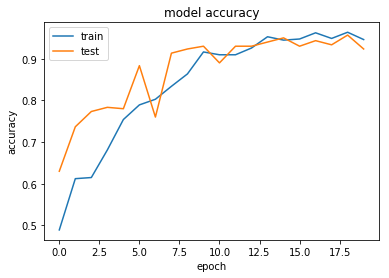

In [161]:
plot_train_val_accuracy(history.history)

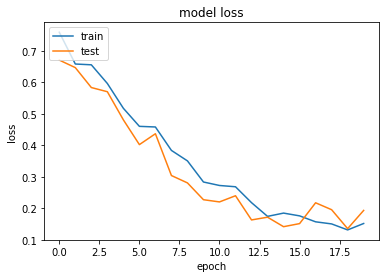

In [162]:
plot_train_val_loss(history.history)

### Model 4: Increasing accuracy with deeper network

** Architecture **
- Conv2D -> MaxPool -> Conv2D -> MaxPool -> Conv2D -> MaxPool -> Dense -> Dropout -> Dense -> Dropout -> (Dense -> Sigmoid)

** Optimizer **

- Adam
- Batch size = 32
- Epoch = 30 (change)

In [163]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=1,input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, input_shape=image_shape))
model.add(LeakyReLU(0.1))
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
    
model.add(Dense(32))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(8))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [164]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

BATCH_SIZE = 32
EPOCHS = 30

history = model.fit(
    X_train_norm, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_norm, y_test),
    verbose=1
)

Train on 740 samples, validate on 300 samples
Epoch 1/30
740/740 [==============================] - 11s 15ms/step - loss: 0.6968 - acc: 0.4919 - val_loss: 0.6908 - val_acc: 0.7400
Epoch 2/30
740/740 [==============================] - 11s 15ms/step - loss: 0.6878 - acc: 0.5446 - val_loss: 0.6769 - val_acc: 0.6567
Epoch 3/30
740/740 [==============================] - 11s 15ms/step - loss: 0.6649 - acc: 0.5662 - val_loss: 0.6062 - val_acc: 0.7467
Epoch 4/30
740/740 [==============================] - 11s 15ms/step - loss: 0.6279 - acc: 0.6446 - val_loss: 0.5569 - val_acc: 0.7700
Epoch 5/30
740/740 [==============================] - 11s 15ms/step - loss: 0.5898 - acc: 0.6824 - val_loss: 0.5602 - val_acc: 0.7167
Epoch 6/30
740/740 [==============================] - 11s 15ms/step - loss: 0.5499 - acc: 0.7257 - val_loss: 0.4004 - val_acc: 0.8467
Epoch 7/30
740/740 [==============================] - 11s 15ms/step - loss: 0.4833 - acc: 0.7784 - val_loss: 0.3304 - val_acc: 0.8967
Epoch 8/30
740/7

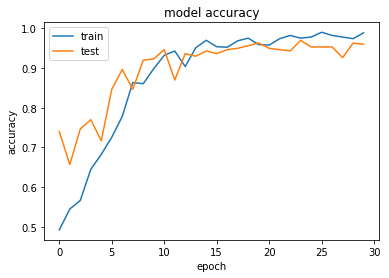

In [165]:
plot_train_val_accuracy(history.history)

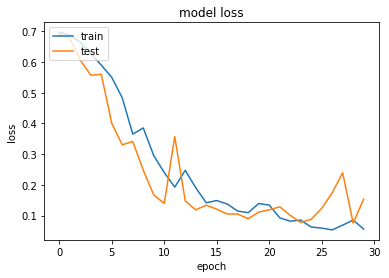

In [166]:
plot_train_val_loss(history.history)

### Model 5: Use pre-built networks via transfer learning

** Architecture **
- VGG16

** Optimizer **

- Adam
- Batch size = 64
- Epoch = 20

In [223]:
from keras.applications import VGG16

In [245]:
# Loading the pre-trained weights
K.clear_session()

conv_model = VGG16(weights='imagenet',
                  include_top=False, # Download only the conv network while skip the last two fully connected layers
                  input_shape=image_shape)

In [246]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [247]:
# Freeze the layers 
for layer in conv_model.layers:
    layer.trainable = False

In [248]:
# Add the custom layers to the top of the network
x = conv_model.output # this has a shape of (None, 8, 8, 512)

x = Flatten()(x) # flatten the output from the conv net of vgg16
x = Dense(64, activation = "relu")(x)
#x = Dropout(0.5)(x)
x = Dense(8, activation = "relu")(x)
#x = Dropout(0.5)(x)

outputs = Dense(1, activation = 'sigmoid')(x)

vgg16_model = Model(input = conv_model.input, output = outputs)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [249]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [ ]:
vgg16_model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

BATCH_SIZE = 64
EPOCHS = 20

history = vgg16_model.fit(
    X_train_norm, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_norm, y_test),
    verbose=1
)

Train on 740 samples, validate on 300 samples
Epoch 1/20
740/740 [==============================] - 238s 322ms/step - loss: 0.7190 - acc: 0.5446 - val_loss: 0.6169 - val_acc: 0.4800
Epoch 2/20
740/740 [==============================] - 238s 322ms/step - loss: 0.5510 - acc: 0.6554 - val_loss: 0.5596 - val_acc: 0.8300
Epoch 3/20
740/740 [==============================] - 238s 322ms/step - loss: 0.4873 - acc: 0.8149 - val_loss: 0.5314 - val_acc: 0.8633
Epoch 4/20
740/740 [==============================] - 239s 322ms/step - loss: 0.4729 - acc: 0.8365 - val_loss: 0.5163 - val_acc: 0.8833
Epoch 5/20
740/740 [==============================] - 238s 322ms/step - loss: 0.4307 - acc: 0.8838 - val_loss: 0.4223 - val_acc: 0.8733
Epoch 6/20
740/740 [==============================] - 239s 322ms/step - loss: 0.2694 - acc: 0.9162 - val_loss: 0.2870 - val_acc: 0.8900
Epoch 7/20
740/740 [==============================] - 239s 322ms/step - loss: 0.1924 - acc: 0.9324 - val_loss: 0.2468 - val_acc: 0.9033
Ep

In [ ]:
plot_train_val_accuracy(history.history)

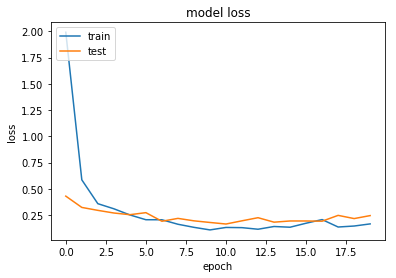

In [242]:
plot_train_val_loss(history.history)